First Step: Setup all the necessary libraries


In [188]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats


Next Step: Import the first data set containing all videos in the channel's watch history

In [189]:
#import the first data set of the channel's watch history
df = pd.read_csv("watch-history.csv")
df.head(10)

,Title,Video URL,Channel,Date Watched,Ad?
0,Watched https://www.youtube.com/watch?v=ifoa0L...,https://www.youtube.com/watch?v=ifoa0LKZaXo,NaN,2024-10-21T23:36:50.230Z,True
1,Watched https://www.youtube.com/watch?v=F-Qc8f...,https://www.youtube.com/watch?v=F-Qc8fNrbzY,NaN,2024-10-21T23:36:45.823Z,True
2,Watched https://www.youtube.com/watch?v=1Lr8Zu...,https://www.youtube.com/watch?v=1Lr8ZuquO-Q,NaN,2024-10-21T23:36:38.805Z,True
3,Viewed Ads On YouTube Homepage,No URL,NaN,2024-10-21T23:36:25.100Z,True
4,Watched https://www.youtube.com/watch?v=c4xEw5...,https://www.youtube.com/watch?v=c4xEw53CYpQ,NaN,2024-10-21T23:36:21.557Z,True
5,Watched https://www.youtube.com/watch?v=hCXxAJ...,https://www.youtube.com/watch?v=hCXxAJrc-Os,NaN,2024-10-21T23:35:23.987Z,False
6,Watched DAVID ENG H277773 EQUITY EARBUDS US 20...,https://www.youtube.com/watch?v=i2vPSRmgqUo,NaN,2024-10-21T23:35:17.975Z,True
7,Watched https://www.youtube.com/watch?v=Ef8vb7...,https://www.youtube.com/watch?v=Ef8vb7mF8a4,NaN,2024-10-21T23:34:10.741Z,False
8,Watched https://www.youtube.com/watch?v=I8zKFw...,https://www.youtube.com/watch?v=I8zKFwzpjZU,NaN,2024-10-21T23:34:05.141Z,False
9,Watched Let's Rank the Leviathans in Subnautic...,https://www.youtube.com/watch?v=BPI0MhG-aqw,Floydson,2024-10-21T23:33:06.309Z,False


Now we can clean out some of the irrelevant data such as all of the ads that were included in the watch history. Also the dataset includes posts one youtuber community boards. We can also drop these entries which start with "viewed" and we can trim out the prepended "Watched" for each of the video titles.

In [190]:
filtered_df = df[df["Ad?"] != True]
filtered_df = filtered_df[~filtered_df["Title"].str.startswith("Viewed ")].reset_index(drop=True)
filtered_df["Title"] = filtered_df["Title"].str.replace("Watched ", "", n=1)

filtered_df

,Title,Video URL,Channel,Date Watched,Ad?
0,https://www.youtube.com/watch?v=hCXxAJrc-Os,https://www.youtube.com/watch?v=hCXxAJrc-Os,NaN,2024-10-21T23:35:23.987Z,False
1,https://www.youtube.com/watch?v=Ef8vb7mF8a4,https://www.youtube.com/watch?v=Ef8vb7mF8a4,NaN,2024-10-21T23:34:10.741Z,False
2,https://www.youtube.com/watch?v=I8zKFwzpjZU,https://www.youtube.com/watch?v=I8zKFwzpjZU,NaN,2024-10-21T23:34:05.141Z,False
3,Let's Rank the Leviathans in Subnautica: Below...,https://www.youtube.com/watch?v=BPI0MhG-aqw,Floydson,2024-10-21T23:33:06.309Z,False
4,https://www.youtube.com/watch?v=tREaghvgqiw,https://www.youtube.com/watch?v=tREaghvgqiw,NaN,2024-10-21T23:28:53.581Z,False
...,...,...,...,...,...
30833,https://www.youtube.com/watch?v=pkjGVzhGEN4,https://www.youtube.com/watch?v=pkjGVzhGEN4,NaN,2018-03-27T00:46:59.455Z,False
30834,SPIDER-MAN ROCK CLIMBING DISASTER (Cell Outs),https://www.youtube.com/watch?v=IyAos6ddX5A,Smosh Games,2018-03-27T00:38:58.436Z,False
30835,LOGAN REAL LIFE TRAINING (Cell Outs),https://www.youtube.com/watch?v=1nBtDv00GgQ,Smosh Games,2018-03-27T00:25:51.738Z,False
30836,ARCHERY PAINTBALL TAG (Cell Outs),https://www.youtube.com/watch?v=A7g23cQlWtc,Smosh Games,2018-03-27T00:18:44.381Z,False


From here I will save this new dataframe into a csv file and use a python script (uploaded to the github repo) to scrape more youtube data about the videos in order to gather more information.

In [191]:
filtered_df.to_csv("filtered_history.csv")

In [192]:
videos = pd.read_csv("videos_dataset.csv")
videos

,Title,Video URL,Channel,Category,View Count,Like Count,Comment Count,Duration
0,"Magnus Carlsen: ""I'm No Genius’"" 😮",https://www.youtube.com/watch?v=hCXxAJrc-Os,GJ_Chess,People & Blogs,1247761.0,57619.0,1469.0,PT51S
1,The MOST VALUABLE ITEM in Stardew Valley 1.6?! 😱,https://www.youtube.com/watch?v=Ef8vb7mF8a4,MRIZ,Gaming,46724.0,3514.0,28.0,PT1M
2,Michael Wants To Sleep with Poki and Lily??,https://www.youtube.com/watch?v=I8zKFwzpjZU,Offline Network,Entertainment,20657.0,2211.0,15.0,PT54S
3,Let's Rank the Leviathans in Subnautica: Below...,https://www.youtube.com/watch?v=BPI0MhG-aqw,Floydson,Gaming,2049923.0,126350.0,752.0,PT56S
4,My last two brain cells trying to do this chal...,https://www.youtube.com/watch?v=tREaghvgqiw,OfflineTV,News & Politics,111920.0,6318.0,46.0,PT34S
...,...,...,...,...,...,...,...,...
28414,TRAPEZE CIRCUS FAIL (Cell Outs),https://www.youtube.com/watch?v=pkjGVzhGEN4,Smosh Games,Gaming,493012.0,9738.0,775.0,PT19M44S
28415,SPIDER-MAN ROCK CLIMBING DISASTER (Cell Outs),https://www.youtube.com/watch?v=IyAos6ddX5A,Smosh Games,Gaming,297159.0,6968.0,861.0,PT11M17S
28416,LOGAN REAL LIFE TRAINING (Cell Outs),https://www.youtube.com/watch?v=1nBtDv00GgQ,Smosh Games,Gaming,460051.0,9020.0,616.0,PT24M26S
28417,ARCHERY PAINTBALL TAG (Cell Outs),https://www.youtube.com/watch?v=A7g23cQlWtc,Smosh Games,Gaming,390391.0,8607.0,484.0,PT13M27S


One thing of note is that the videos data set is not the same size as the filtered history data set.

In [193]:
len1 = filtered_df.shape[0]
len2 = videos.shape[0]  #gets number of rows in each dataframe

print(len1)
print(len2)

print(len1-len2) # the difference in number

30838
28419
2419


So the total difference between the filtered dataset and the videos data set is 2419 row entries. Let's take a closer look at the filtered dataset since the python script used to query the Youtube data API requires a valid URL. So lets see the row entries that don't have a URL:

In [194]:
no_url = filtered_df[filtered_df["Video URL"]=="No URL"]
no_url

,Title,Video URL,Channel,Date Watched,Ad?
486,Answered survey question,No URL,Question: Uyavuma yini ukuthi isikhangiso sang...,2024-08-09T18:42:32.939Z,False
1214,Answered survey question,No URL,Question: Sicela ulinganisele okwenzeke kuwe n...,2024-04-07T15:13:34.687Z,False
1480,Answered survey question,No URL,Question: 過去一週內，您是否曾研究濾水器或淨水器的購買資訊？,2024-01-25T15:40:08.936Z,False
2354,Answered survey question,No URL,Question: Uyavuma yini ukuthi isikhangiso sang...,2023-10-28T03:51:41.926Z,False
2461,Answered survey question,No URL,Question: Uyavuma yini ukuthi isikhangiso sang...,2023-09-22T01:40:46.129Z,False
3044,Answered survey question,No URL,Question: Uyavuma yini ukuthi isikhangiso sang...,2023-06-08T16:18:24.704Z,False
3140,Answered survey question,No URL,Question: Uyavuma yini ukuthi isikhangiso sang...,2023-04-12T23:04:44.778Z,False
3307,Answered survey question,No URL,Question: Ingabe ziphinde kangakanani izikhang...,2023-01-08T02:41:44.320Z,False
3343,Answered survey question,No URL,Question: Ingabe uzizwa kanjani ngokuphindaphi...,2022-12-16T23:31:22.290Z,False
3441,Answered survey question,No URL,Question: Ingabe uyavuma ukuthi inani lezikhan...,2022-11-15T00:24:21.305Z,False


These entries are all listed as survey questions so since it doesn't pertain to the actual video watch history we can drop these entries. Lets also try and see what other entries are not within the video data set but is in the filtered dataset.


In [195]:
filtered_df = filtered_df[filtered_df["Video URL"] != "No URL"]
not_present = filtered_df[~filtered_df["Video URL"].isin(videos["Video URL"])]
not_present

,Title,Video URL,Channel,Date Watched,Ad?
145,https://www.youtube.com/watch?v=BFG3WUW5QV8,https://www.youtube.com/watch?v=BFG3WUW5QV8,NaN,2024-09-22T18:53:23.950Z,False
185,https://www.youtube.com/watch?v=T7Jlm_P4HwU,https://www.youtube.com/watch?v=T7Jlm_P4HwU,NaN,2024-09-19T20:12:53.188Z,False
740,https://www.youtube.com/watch?v=TQSi1cuEeoM,https://www.youtube.com/watch?v=TQSi1cuEeoM,NaN,2024-06-30T00:18:10.804Z,False
976,https://www.youtube.com/watch?v=9pHT46WrXKQ,https://www.youtube.com/watch?v=9pHT46WrXKQ,NaN,2024-05-20T01:53:34.764Z,False
1000,https://www.youtube.com/watch?v=dxLvfHS4j_4,https://www.youtube.com/watch?v=dxLvfHS4j_4,NaN,2024-05-17T06:59:20.835Z,False
...,...,...,...,...,...
30733,https://www.youtube.com/watch?v=UTsbmlf-rv8,https://www.youtube.com/watch?v=UTsbmlf-rv8,NaN,2018-04-04T22:04:30.469Z,False
30739,https://www.youtube.com/watch?v=7mHa4q7RlaE,https://www.youtube.com/watch?v=7mHa4q7RlaE,NaN,2018-04-02T15:39:24.734Z,False
30755,https://www.youtube.com/watch?v=femunQQTrk8,https://www.youtube.com/watch?v=femunQQTrk8,NaN,2018-04-01T17:49:04.087Z,False
30763,https://www.youtube.com/watch?v=con9JUhk7s0,https://www.youtube.com/watch?v=con9JUhk7s0,NaN,2018-04-01T15:54:22.795Z,False


These listed URLs are not present within the video dataset and after inspecting them it seems that these videos are all unavailable on the platform. This could be due to a number of reasong such as copyright claims, someone choosing to delete something, someone changing the video visibility, etc. Since these videos have been removed at random they shouldn't affect the analysis and can be dropped from the dataframe. Seeing as the watch history dataframe contains many of the same columns as the videos dataframe we can combine the two datasets and just add the date column onto the videos dataframe.


Another thing of note is that the duration column of the videos dataset isn't in an easily comparible state. As such we can transform it into the total minutes of a video in order to prepare it for our analysis. Let's also convert the date watched into a datetime object while we are at it.


In [196]:
filtered_df = filtered_df[filtered_df["Video URL"].isin(videos["Video URL"])]
watch_history = filtered_df.reset_index(drop=True) #renaming just for clarity

videos = videos.join(watch_history["Date Watched"])
videos["Date Watched"] = pd.to_datetime(videos["Date Watched"], format='ISO8601')
videos

# Possible time examples: PT34S, PT1H13M2S, PT42M51S
def to_minutes(duration):
    total = 0

    hours = re.search(r'(\d+)H', duration)
    minutes = re.search(r'(\d+)M', duration)
    seconds = re.search(r'(\d+)S', duration)

    # If matches are found add to sum
    if hours:
        total += 60 * int(hours.group(1))
    if minutes:
        total += int(minutes.group(1))
    if seconds:
        total += int(seconds.group(1)) / 60

    return total

videos["Duration (Min)"] = videos["Duration"].apply(to_minutes)
videos

,Title,Video URL,Channel,Category,View Count,Like Count,Comment Count,Duration,Date Watched,Duration (Min)
0,"Magnus Carlsen: ""I'm No Genius’"" 😮",https://www.youtube.com/watch?v=hCXxAJrc-Os,GJ_Chess,People & Blogs,1247761.0,57619.0,1469.0,PT51S,2024-10-21 23:35:23.987000+00:00,0.850000
1,The MOST VALUABLE ITEM in Stardew Valley 1.6?! 😱,https://www.youtube.com/watch?v=Ef8vb7mF8a4,MRIZ,Gaming,46724.0,3514.0,28.0,PT1M,2024-10-21 23:34:10.741000+00:00,1.000000
2,Michael Wants To Sleep with Poki and Lily??,https://www.youtube.com/watch?v=I8zKFwzpjZU,Offline Network,Entertainment,20657.0,2211.0,15.0,PT54S,2024-10-21 23:34:05.141000+00:00,0.900000
3,Let's Rank the Leviathans in Subnautica: Below...,https://www.youtube.com/watch?v=BPI0MhG-aqw,Floydson,Gaming,2049923.0,126350.0,752.0,PT56S,2024-10-21 23:33:06.309000+00:00,0.933333
4,My last two brain cells trying to do this chal...,https://www.youtube.com/watch?v=tREaghvgqiw,OfflineTV,News & Politics,111920.0,6318.0,46.0,PT34S,2024-10-21 23:28:53.581000+00:00,0.566667
...,...,...,...,...,...,...,...,...,...,...
28414,TRAPEZE CIRCUS FAIL (Cell Outs),https://www.youtube.com/watch?v=pkjGVzhGEN4,Smosh Games,Gaming,493012.0,9738.0,775.0,PT19M44S,2018-03-27 00:46:59.455000+00:00,19.733333
28415,SPIDER-MAN ROCK CLIMBING DISASTER (Cell Outs),https://www.youtube.com/watch?v=IyAos6ddX5A,Smosh Games,Gaming,297159.0,6968.0,861.0,PT11M17S,2018-03-27 00:38:58.436000+00:00,11.283333
28416,LOGAN REAL LIFE TRAINING (Cell Outs),https://www.youtube.com/watch?v=1nBtDv00GgQ,Smosh Games,Gaming,460051.0,9020.0,616.0,PT24M26S,2018-03-27 00:25:51.738000+00:00,24.433333
28417,ARCHERY PAINTBALL TAG (Cell Outs),https://www.youtube.com/watch?v=A7g23cQlWtc,Smosh Games,Gaming,390391.0,8607.0,484.0,PT13M27S,2018-03-27 00:18:44.381000+00:00,13.450000


Now that the datasets have gone through some initial cleaning and processing we can start examining key features of the dataset. First of all lets see some basic summary statistics of the dataset.

In [197]:
videos.info()
videos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28419 entries, 0 to 28418
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Title           28419 non-null  object             
 1   Video URL       28419 non-null  object             
 2   Channel         28419 non-null  object             
 3   Category        28419 non-null  object             
 4   View Count      28393 non-null  float64            
 5   Like Count      28373 non-null  float64            
 6   Comment Count   27778 non-null  float64            
 7   Duration        28419 non-null  object             
 8   Date Watched    28419 non-null  datetime64[ns, UTC]
 9   Duration (Min)  28419 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 2.2+ MB


,View Count,Like Count,Comment Count,Duration (Min)
count,2.839300e+04,2.837300e+04,2.777800e+04,28419.000000
mean,6.649067e+06,1.487695e+05,7.721768e+03,18.572040
std,3.708439e+07,5.059813e+05,3.300550e+04,37.782237
min,7.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.570960e+05,9.880000e+03,5.820000e+02,7.133333
50%,1.405756e+06,3.602700e+04,1.831000e+03,12.983333
75%,4.709618e+06,1.254570e+05,5.895750e+03,20.216667
max,3.730024e+09,1.833026e+07,2.368414e+06,1420.016667


From the basic info above we can see that almost all columns except the comments, likes, and views columns have all rows filled with values. The comments column contains some NaN values due to the fact that some videos do not have comments enabled. Similarly the likes and views columns may have NaN values due to the fact that some videos do not make their counts viewable to the public. Looking at the standard deviations for the numerical columns we have high values. This indicates that the dataset has a large amount of variability within it.

Next let's see all of the different video categories that are present within the dataset.

Text(0.5, 0, 'Category')

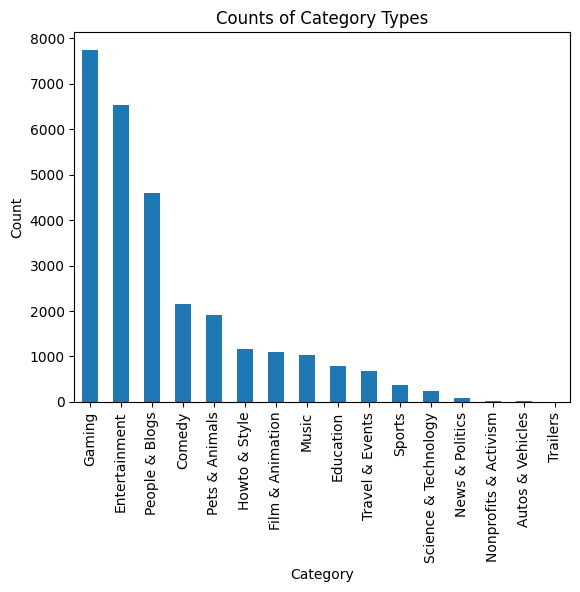

In [198]:
cat_counts = videos["Category"].value_counts()

cat_counts.plot(kind="bar")
plt.title("Counts of Category Types")
plt.ylabel("Count")
plt.xlabel("Category")


From the plot it can be seen that gaming videos are the most frequently watched category of videos. Lets group the videos dataset according to the category and list the mean view, like, and comment counts for each one.

In [199]:
grouped = videos.groupby("Category")[["View Count", "Like Count", "Comment Count"]].mean()
grouped

,View Count,Like Count,Comment Count
Category,,,
Autos & Vehicles,6.951393e+05,11070.800000,860.700000
Comedy,7.037875e+06,183132.138760,10255.543056
Education,3.287391e+06,116505.432778,6606.301158
Entertainment,9.278229e+06,200567.937864,9308.312639
Film & Animation,8.714130e+06,210747.325751,13541.422078
Gaming,3.338422e+06,114072.845489,5522.224938
Howto & Style,6.186834e+06,131191.079585,7753.477056
Music,3.616509e+07,463825.213873,25565.373541
News & Politics,7.288559e+06,162131.517647,8166.734940


From the table above it is hard to tell whether the category I watched may or may not have an effect on the mean statistics at least for the view and like count. Let's do an ANOVA test to see whether accross the categories I watched there are any statistically significant differences in the view, like, or comment count. For our ANOVA test lets mark our statistical significance as α = .05 and state our null hypothesis as categories do not affect the view, like, or comment count.

In [200]:
view_anova = stats.f_oneway(videos[videos["Category"]=="Autos & Vehicles"]["View Count"], videos[videos["Category"]=="Comedy"]["View Count"], videos[videos["Category"]=="Education"]["View Count"], videos[videos["Category"]=="Entertainment"]["View Count"], videos[videos["Category"]=="Film & Animation"]["View Count"], videos[videos["Category"]=="Gaming"]["View Count"], videos[videos["Category"]=="Howto & Style"]["View Count"], videos[videos["Category"]=="Music"]["View Count"], videos[videos["Category"]=="News & Politics"]["View Count"], videos[videos["Category"]=="Nonprofits & Activism"]["View Count"], videos[videos["Category"]=="People & Blogs"]["View Count"], videos[videos["Category"]=="Pets & Animals"]["View Count"], videos[videos["Category"]=="Science & Technology"]["View Count"], videos[videos["Category"]=="Sports"]["View Count"], videos[videos["Category"]=="Travel & Events"]["View Count"], nan_policy="omit")
like_anova = stats.f_oneway(videos[videos["Category"]=="Autos & Vehicles"]["Like Count"], videos[videos["Category"]=="Comedy"]["Like Count"], videos[videos["Category"]=="Education"]["Like Count"], videos[videos["Category"]=="Entertainment"]["Like Count"], videos[videos["Category"]=="Film & Animation"]["Like Count"], videos[videos["Category"]=="Gaming"]["Like Count"], videos[videos["Category"]=="Howto & Style"]["Like Count"], videos[videos["Category"]=="Music"]["Like Count"], videos[videos["Category"]=="News & Politics"]["Like Count"], videos[videos["Category"]=="Nonprofits & Activism"]["Like Count"], videos[videos["Category"]=="People & Blogs"]["Like Count"], videos[videos["Category"]=="Pets & Animals"]["Like Count"], videos[videos["Category"]=="Science & Technology"]["Like Count"], videos[videos["Category"]=="Sports"]["Like Count"], videos[videos["Category"]=="Travel & Events"]["Like Count"], nan_policy="omit")
comment_anova = stats.f_oneway(videos[videos["Category"]=="Autos & Vehicles"]["Comment Count"], videos[videos["Category"]=="Comedy"]["Comment Count"], videos[videos["Category"]=="Education"]["Comment Count"], videos[videos["Category"]=="Entertainment"]["Comment Count"], videos[videos["Category"]=="Film & Animation"]["Comment Count"], videos[videos["Category"]=="Gaming"]["Comment Count"], videos[videos["Category"]=="Howto & Style"]["Comment Count"], videos[videos["Category"]=="Music"]["Comment Count"], videos[videos["Category"]=="News & Politics"]["Comment Count"], videos[videos["Category"]=="Nonprofits & Activism"]["Comment Count"], videos[videos["Category"]=="People & Blogs"]["Comment Count"], videos[videos["Category"]=="Pets & Animals"]["Comment Count"], videos[videos["Category"]=="Science & Technology"]["Comment Count"], videos[videos["Category"]=="Sports"]["Comment Count"], videos[videos["Category"]=="Travel & Events"]["Comment Count"], nan_policy="omit")

print("ANOVA for View Count:")
print("F-statistic:", view_anova.statistic)
print("p-value:", view_anova.pvalue)

print("\nANOVA for Like Count:")
print("F-statistic:", like_anova.statistic)
print("p-value:", like_anova.pvalue)

print("\nANOVA for Comment Count:")
print("F-statistic:", comment_anova.statistic)
print("p-value:", comment_anova.pvalue)

ANOVA for View Count:
F-statistic: 60.500591309938855
p-value: 3.982746306618048e-169

ANOVA for Like Count:
F-statistic: 51.617927068847294
p-value: 2.999237540094993e-143

ANOVA for Comment Count:
F-statistic: 34.1540360427735
p-value: 2.720894597885004e-92


Looking at the results of the ANOVA tests we can see that each test has produced a p value much less than .05, our chosen level of significance. This indicates that based on my watch history, the like, comment, and view counts are statistically different accross the different categories and we can reject the null hypothesis. We can better visualize this through displaying boxplots of each of the different categories.

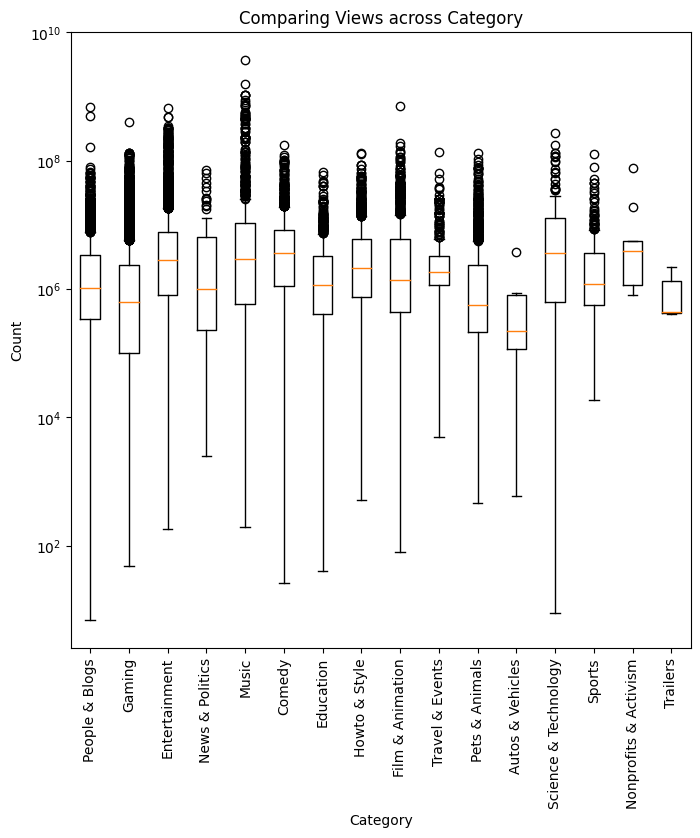

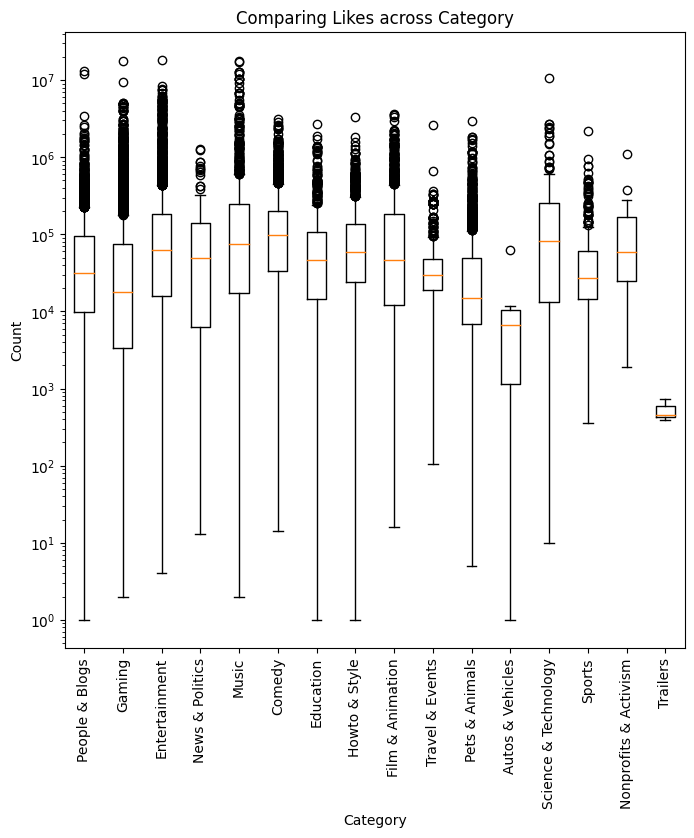

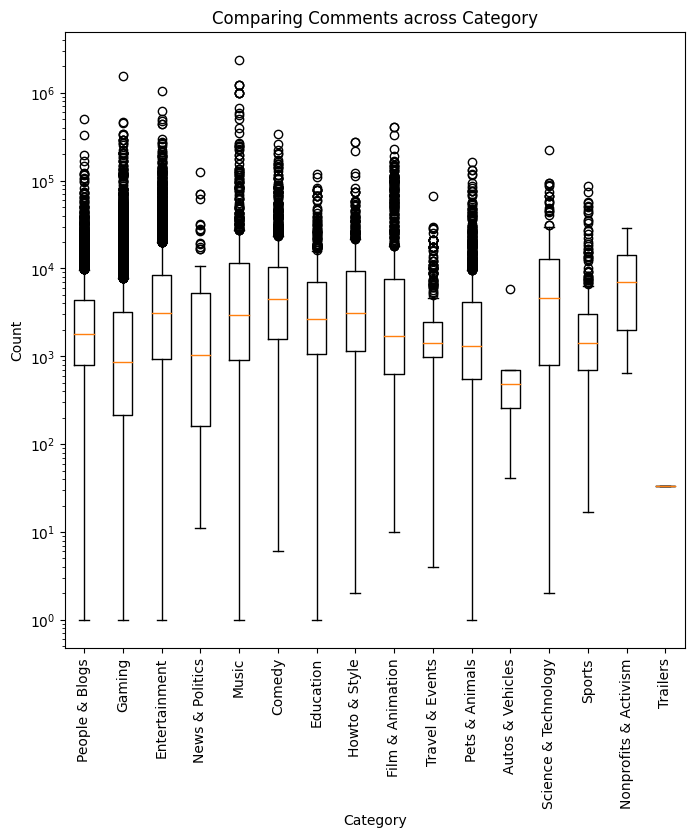

In [201]:
plt.figure(figsize=(8, 8))
plt.ylim()
plt.yscale('log')
plt.boxplot([videos[videos["Category"] == cat]["View Count"][videos["View Count"] > 0] for cat in videos["Category"].unique()], labels=videos["Category"].unique())
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Comparing Views across Category")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 8))
plt.ylim()
plt.yscale('log')
plt.boxplot([videos[videos["Category"] == cat]["Like Count"][videos["Like Count"] > 0] for cat in videos["Category"].unique()], labels=videos["Category"].unique())
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Comparing Likes across Category")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 8))
plt.ylim()
plt.yscale('log')
plt.boxplot([videos[videos["Category"] == cat]["Comment Count"][videos["Comment Count"] > 0] for cat in videos["Category"].unique()], labels=videos["Category"].unique())
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Comparing Comments across Category")
plt.xticks(rotation=90)
plt.show()


From the ANOVA test we have been able to see that the counts for views, likes, and comments are statistically different accross some of the categories. To better determine which of the categories is statistically different it would require further follow up testing. Let's also see if there are any correlations between view, like, and comment counts for all videos. For this we will use a correlation matrix to see if there are any positive or negative correlations between the three counts

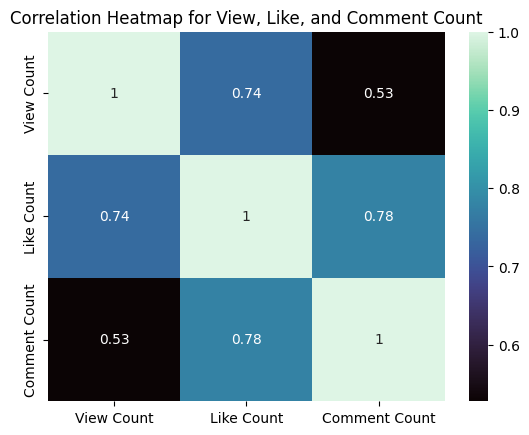

In [202]:
corr_mat = videos[["View Count", "Like Count", "Comment Count"]].corr()
sns.heatmap(corr_mat, annot=True, cmap="mako")
plt.title("Correlation Heatmap for View, Like, and Comment Count")
plt.show()

From the correlation matrix we have generated a heatmap to better display how strong the correlations are. A correlation coefficient close to positive 1 indicates a strong positive correlation between the two variables. So if one variable increases then it is likely that the other variable will also increase. From the graph we can see that the coefficient between views and likes is .74 which is close to 1. This indicates that there is a strong positive correlation between views and likes. Similarly the coefficient between likes and comments is .78 which indicates an even stronger correlation between likes and comments. The correlation coefficient between comments and views is .53 which indicates that there is a moderate correlation between views and comments.

Next lets examine whether the average video duration has changed from recent years compared to previous years. First lets categorize videos into recent which I will count as within the past year, and old which I will count as videos from 2018.

In [212]:
recent_videos = videos[videos["Date Watched"] >= pd.to_datetime(datetime.now() - timedelta(days=365), utc=True)].reset_index(drop=True)

old_videos = videos[videos["Date Watched"] <= "2018-12-31"].reset_index(drop=True)

Now that we have our two filtered sets, I will perform a two sample t-test to compare the mean watch time from 2018 and the past year. For our null hypothesis we will state that there is no significant difference between the mean video duration between videos from 2018 and videos watched within the past year. The alternative hypothesis will be that there is a significant difference between the video durations. Our level of significance will be set as α = .05.

In [216]:
res = stats.ttest_ind(old_videos["Duration (Min)"], recent_videos["Duration (Min)"])

print("T test statistic: ", res.statistic)
print("p value: ", res.pvalue)

T test statistic:  -21.342808696071966
p value:  1.2650946338380396e-98


From the results of the t-test we can see that the p value is extremely small and falls below α = .05. This means that we can reject the null hypothesis. To better visualize the difference in video duration let's plot the durations. Since there are many many videos in each set I will find the average duration for videos watched per month. Since the recent videos doesn't start in January I've labeled it as months in the year. So first month on the plot will be January of 2018 but October of 2023 and so on.

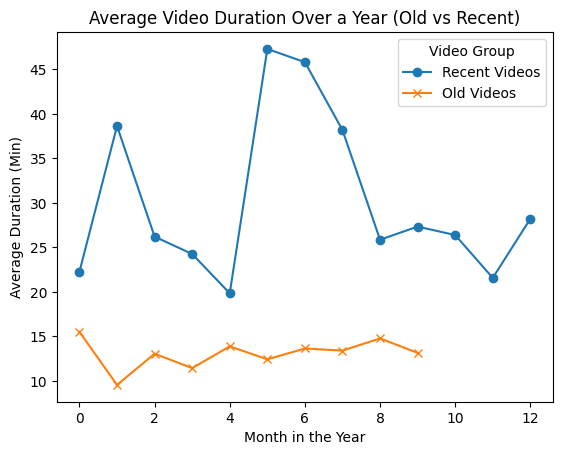

In [230]:
recent_avgs = recent_videos.groupby([recent_videos["Date Watched"].dt.year, recent_videos["Date Watched"].dt.month])["Duration (Min)"].mean().reset_index(drop=True)
old_avgs = old_videos.groupby([old_videos["Date Watched"].dt.year, old_videos["Date Watched"].dt.month])["Duration (Min)"].mean().reset_index(drop=True)

plt.plot(recent_avgs, label="Recent Videos", marker="o")
plt.plot(old_avgs, label='Old Videos', marker="x")
plt.title("Average Video Duration Over a Year (Old vs Recent)")
plt.xlabel("Month in the Year")
plt.ylabel("Average Duration (Min)")
plt.legend(title="Video Group")
plt.show()


From the graph above it makes sense on why the means are statistically different from each other as we can observe that on average for each month, the videos from the recent year are higher than those from 2018.